# AeroBot - Modeling phase - Iteration 1


Following the initial data audit and visualization phase of our project 'AeroBot', we now focus on NLP of the Narratives and try our first predictive algorithms based on the label 'Primary Problem'.

## About

First NLP models of our project.


**Tutor**

* Alban THUET

**Authors:**

* Hélène ASSIR
* Hichem HADJI  
* [Ioannis STASINOPOULOS](https://www.linkedin.com/in/ioannis-stasinopoulos/)

</br>

---
</br>

**Version History**

Version | Date       | Author | Modification
--------|----------- | ------ | --------------------------
X.X     | XX/XX/2022 | A.B    | modif
1.0     | 11/06/2022 | I.S    | Document creation

## Load the data

### Mount & explore your Google Drive

In [ ]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#check your present working directory 
%pwd

'/content'

In [ ]:
# move to the desired location (adapt to your folder-tree-structure):
%cd /content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot/

/content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot


In [ ]:
!ls # list the content of the pwd

#!ls "/content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot/" # list contect of a speficic folder

ASRS_20y_data.csv			   Narratives.pkl
D1_DRAFT_Dataviz_Ioannis_20220527.gslides  plane.png


### Copy Ioannis' file to your Google Drive

This section shows you how to copy the file from Ioannis's Google Drive into the pwd of your Google Drive.

**Uncomment and execute the cells, if desired.**

Source: 
https://towardsdatascience.com/different-ways-to-connect-google-drive-to-a-google-colab-notebook-pt-1-de03433d2f7a

In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# file_id = '16My7pG4Ral93VIAQrCTpcMn5JTa79DGo' 
# # This is the id of the ASRS_20y_data.csv file in Ioannis' Google Drive, which he has shared with you
# # (To find the id of a file, click 'share' and 'get link' and copy the large nonsense part of the link

# # 'download' the file to your present working directory 
# download = drive.CreateFile({'id': file_id})
# download.GetContentFile('copied_file.csv')
# df  = pd.read_csv("copied_file.csv")
# df.head()

## Import packages

In [ ]:
#######################
# Import packages
#######################
import numpy as np
import seaborn as sns

import pandas as pd
# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import itertools # Pour créer des iterateurs

######################
# PLOTTING
######################
import matplotlib.pyplot as plt
%matplotlib inline
# Define global plot parameters for better readability and consistency among plots
# A complete list of the rcParams keys can be retrieved via plt.rcParams.keys() function
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23
plt.rc('legend', fontsize=23)    # legend fontsize

# BOKEH 
from bokeh.plotting import figure # Importation de la classe figure qui permet de créer un graphique bokeh.
from bokeh.io import  push_notebook, output_notebook, show
output_notebook() # permet d'afficher tous les futurs graphiques dans l'output d'une cellule jupyter. Si cette instruction n'est pas lancée, la figure s'affichera dans un nouvel onglet.
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
from bokeh.models.tools import HoverTool

#####################
# NLP 
#####################
import re # for Regular Expression handling
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') # WordNet lemmatizer
nltk.download('omw-1.4') # necessary for WordNet lemmatizer
from nltk.tokenize import word_tokenize # Usual tokenizer
from nltk.tokenize import TweetTokenizer # Special tokenizer;  "we'll", "didn't", etc. are considered as one word
from sklearn.feature_extraction.text import CountVectorizer # Vectorization
from nltk.corpus import stopwords # Import stopwords from nltk.corpus

###############################
# ML preprocessing and models
###############################
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix

import pickle as pkl # Saving data externally

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df = pd.read_csv('ASRS_20y_data.csv', low_memory=False)
# See https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [ ]:
df.head(3)

,Unnamed: 0,ACN,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Latitude / Longitude (UAS),Flight Conditions,Weather Elements / Visibility,Work Environment Factor,Light,Ceiling,RVR.Single Value,ATC / Advisory,Aircraft Operator,Make Model Name,Aircraft Zone,Crew Size,Operating Under FAR Part,Flight Plan,Mission,Nav In Use,Flight Phase,Route In Use,Airspace,Maintenance Status.Maintenance Deferred,Maintenance Status.Records Complete,Maintenance Status.Released For Service,Maintenance Status.Required / Correct Doc On Board,Maintenance Status.Maintenance Type,Maintenance Status.Maintenance Items Involved,Cabin Lighting,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Airspace Authorization Provider (UAS),Operating Under Waivers / Exemptions / Authorizations (UAS),Waivers / Exemptions / Authorizations (UAS),Airworthiness Certification (UAS),Weight Category (UAS),Configuration (UAS),Flight Operated As (UAS),Flight Operated with Visual Observer (UAS),Control Mode (UAS),Flying In / Near / Over (UAS),Passenger Capable (UAS),Type (UAS),Number of UAS Being Controlled (UAS),Aircraft Component,Manufacturer,Aircraft Reference,Problem,ATC / Advisory.1,Aircraft Operator.1,Make Model Name.1,Aircraft Zone.1,Crew Size.1,Operating Under FAR Part.1,Flight Plan.1,Mission.1,Nav In Use.1,Flight Phase.1,Route In Use.1,Airspace.1,Maintenance Status.Maintenance Deferred.1,Maintenance Status.Records Complete.1,Maintenance Status.Released For Service.1,Maintenance Status.Required / Correct Doc On Board.1,Maintenance Status.Maintenance Type.1,Maintenance Status.Maintenance Items Involved.1,Cabin Lighting.1,Number Of Seats.Number.1,Passengers On Board.Number.1,Crew Size Flight Attendant.Number Of Crew.1,Airspace Authorization Provider (UAS).1,Operating Under Waivers / Exemptions / Authorizations (UAS).1,Waivers / Exemptions / Authorizations (UAS).1,Airworthiness Certification (UAS).1,Weight Category (UAS).1,Configuration (UAS).1,Flight Operated As (UAS).1,Flight Operated with Visual Observer (UAS).1,Control Mode (UAS).1,Flying In / Near / Over (UAS).1,Passenger Capable (UAS).1,Type (UAS).1,Number of UAS Being Controlled (UAS).1,Location Of Person,Location In Aircraft,Reporter Organization,Function,Qualification,Experience,Cabin Activity,Human Factors,Communication Breakdown,UAS Communication Breakdown,ASRS Report Number.Accession Number,Location Of Person.1,Location In Aircraft.1,Reporter Organization.1,Function.1,Qualification.1,Experience.1,Cabin Activity.1,Human Factors.1,Communication Breakdown.1,UAS Communication Breakdown.1,ASRS Report Number.Accession Number.1,Anomaly,Miss Distance,Were Passengers Involved In Event,Detector,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative.1,Callback.1,Synopsis,Unnamed: 125
0,0,986560,201201,1801-2400,A11.TRACON,AK,NaN,NaN,NaN,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRACON A11,Air Taxi,Super King Air 200,NaN,1.0,Part 135,IFR,Passenger,NaN,Descent,Vectors,Class E ANC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Facility A11.TRACON,NaN,Government,Departure; Approach,Air Traffic Control Developmental,NaN,NaN,Situational Awareness,NaN,NaN,986560.0,NaN,Flight Deck,Air Taxi,Captain; Pilot Flying,NaN,Flight Crew Last 90 Days 46; Flight Crew Total...,NaN,NaN,NaN,NaN,986993.0,Deviation - Altitude Excursion From Assigned A...,NaN,NaN,Person Air Traffic Control,NaN,Air Traffic Control Issued New Clearance,Human Factors,Human Factors,A BE20 was inbound to ANC via YESKA. He was to...,NaN,I was descending to 8;000 FT proceeding direct...,NaN,A11 Controller described a descent below MVA; ...,NaN
1,1,988077,201201,000

In [ ]:
print("The raw dataset has a total of", len(df), "entries.",
     "\n/!\ These include unmanned-aircraft-related entries; yet the latter are insignificantly low in number (see below)")

The raw dataset has a total of 108407 entries. 
/!\ These include unmanned-aircraft-related entries; yet the latter are insignificantly low in number (see below)


## Remove UAS-related data

A UAS (Unmanned Aircraft Systems) includes not only the UAV (or drone), but also the person on the ground controlling the flight and the system in place that connects both of them.

### Find out how many UAS-entries we have

In [ ]:
features_UAS_all = [
###################################
### FEATURES RELATED TO DRONES  ###
###################################
 'Latitude / Longitude (UAS)',
    'Operating Under Waivers / Exemptions / Authorizations (UAS)',
  'Waivers / Exemptions / Authorizations (UAS)',
  'Airworthiness Certification (UAS)', # Only 'Standard' value
  'Weight Category (UAS)',
  'Configuration (UAS)',
  'Flight Operated As (UAS)',
  'Flight Operated with Visual Observer (UAS)', # BVLOS (Beyond Visual Line of Sight) is a term relating to the operation of UAVs (unmanned aerial vehicles) and drones at distances outside the normal visible range of the pilot.
 'Control Mode (UAS)',
 'Flying In / Near / Over (UAS)',
 'Passenger Capable (UAS)', # There are only NaNs and 'N'
 'Type (UAS)',
 'Number of UAS Being Controlled (UAS)',
 'UAS Communication Breakdown',    
 'Airspace Authorization Provider (UAS)', # only NaN's in this feature --> drop ?

    
##################################################
### Additional entries for the above variables ###
##################################################
 'Airspace Authorization Provider (UAS).1',
 'Operating Under Waivers / Exemptions / Authorizations (UAS).1',
 'Waivers / Exemptions / Authorizations (UAS).1',
 'Airworthiness Certification (UAS).1',
 'Weight Category (UAS).1',
 'Configuration (UAS).1',
 'Flight Operated As (UAS).1',
 'Flight Operated with Visual Observer (UAS).1',
 'Control Mode (UAS).1',
 'Flying In / Near / Over (UAS).1',
 'Passenger Capable (UAS).1',
 'Type (UAS).1',
 'Number of UAS Being Controlled (UAS).1',    
##################################################
]

In [ ]:
# Search and gather the rows that contain non-nan values for any of the UAS features into dataframes

files = [] # instantiate empty list

for feat in features_UAS_all:
    
    # append pandas DataFrames to 'files' --> files becomes list of df's.
    files.append(df.loc[df[feat].isna() == False])

# concatenate df's into 1 df:
df_UAS = pd.concat(files)

# Drop the duplicates; there definitely exist many, because we searched column-by-column
df_UAS = df_UAS.drop_duplicates(keep= 'first')

In [ ]:
print("The data contain", len(df_UAS), "UAS-related entries.")

The data contain 166 UAS-related entries.


This quantity of UAS entries seems reasonable, because these data have NaN's in many MANNED-aircraft-related features, as shown in the next line. Note that 'Make Model Name' has no NaNs.

In [ ]:
df_UAS.isna().sum()

Unnamed: 0                                                         0
ACN                                                                0
Date                                                               0
Local Time Of Day                                                 18
Locale Reference                                                   1
State Reference                                                    0
Relative Position.Angle.Radial                                   138
Relative Position.Distance.Nautical Miles                         79
Altitude.AGL.Single Value                                         83
Altitude.MSL.Single Value                                         98
Latitude / Longitude (UAS)                                       166
Flight Conditions                                                 20
Weather Elements / Visibility                                     68
Work Environment Factor                                          162
Light                             

### Drop UAS-related features and data

In [ ]:
# remove rows
df = df.drop(df_UAS.index, axis = 0)

In [ ]:
# Check: 
len(df) + len(df_UAS)

108407

In [ ]:
# remove UAS-columns
df = df.drop(columns= features_UAS_all)

## Define feature data and target data

### Deal with NaN's

There are some NaN's in the data:

In [ ]:
df['Primary Problem'].isna().sum()

449

In [ ]:
# # Show the first 3 rows with Primary Problem = NaN
# df[df['Primary Problem'].isna()][:3]

In [ ]:
# Drop the rows for which Primary Problem = NaN
df = df.dropna(subset = ['Primary Problem'])

In [ ]:
# First, SELECT ONLY X entries to test the algorithms
df = df[:100]

In [ ]:
# Define target data
target = df['Primary Problem']

# Feature data is defined below


# Text processing

## Tokenization Stemming & Stop-word filtering

In [ ]:
def tokenize_stem_filter(text):
    """
    Tokenize and stem 'text', then filter out stop-words (incl. user-defined ones)
    Returns the tokenized text as 1st output
    Returns the updated stopwords as 2nd output
    """
    #############################################################
    # TOKENIZATION
    ######################
    from nltk.tokenize import TweetTokenizer 

    tokenizer = TweetTokenizer()
    # "we'll", "didn't", etc. are considered as one word
    tokens = tokenizer.tokenize(text.lower())
    # lower-casing the text is crucial for the stop word filtering below    

    # Alternative: 'normal' tokenizer (yields similar results to TweetTokenizer):
    #from nltk.tokenize import word_tokenize # Tokenization
    #tokens = word_tokenize(text.lower(), language = 'english') 
    
    #############################################################
    # STEMMING
    ######################
    from nltk.stem.snowball import EnglishStemmer

    # inner function
    def stemming(tokens):
        """
        Stem the list of tokens passed as input
        """
        stemmer = EnglishStemmer()
        radicals = []
        
        for word in tokens:
            radical = stemmer.stem(word)
            radicals.append(radical)

        return set(radicals) # remove any duplicates

    # Call the stemming function
    tokens = stemming(tokens)

    #############################################################
    # STOP WORD FILTERING
    ######################
    
    # Import stopwords from nltk.corpus
    from nltk.corpus import stopwords

    # Initialiser la variable des mots vides
    stop_words = set(stopwords.words('english')) 
    # we convert it to a set, more efficient (vs. a liste) 
    # when searching for stopwords. A set also removes duplicates.

    # add additional stop words, if desired : 
    stop_words.update(['.', ';', '[', ']', '(', ')',
                       "they've", "they're", "they'll", 
                       "i've", "i'm", "i'll", "could"])
    
    # inner function
    def stop_words_filtering(my_list):
        """
        Delete stop words from the function input ‘my_list’.
        """
        # remove duplicate words from liste
        set_my_list = set(my_list) 
        my_list = list(set_my_list)

        for stopword in stop_words:

            if stopword in my_list:
                my_list.remove(stopword)

        return my_list

    # call the stop-word filtering function
    tokenized_filtered_words = stop_words_filtering(tokens)
    #############################################################
    
    
    # compile the list of tokens into one text bloc:
    tokenized_filtered_text = ''
    tokenized_filtered_text = ' '.join(entry for entry in tokenized_filtered_words)
    
    return tokenized_filtered_text, stop_words

### [Sandbox] - Compare stemmer() and lemmatizer()

This section is a sandbox for comparing the stemmer and lemmatizer functions.

In [ ]:
#@title
# LEMMATIZER
from nltk.stem.wordnet import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
#Calcul le lemme :
wordnet_lemmatizer.lemmatize('airplane', 
                             pos = 'n' # if you don't pass this argument, the results are poor
                             ) # consider it a verb 'v'

# le paramètre 'pos' permet de préciser si le mot à lemmatiser est considéré comme un verbe: pos = 'v' ou un nom: pos = 'n'

'airplane'

In [ ]:
#@title
# STEMMER
from nltk.stem.snowball import EnglishStemmer
def stemming(tokens):
    """
    Stem the list of tokens passed as input
    """
    stemmer = EnglishStemmer()
    radicals = []
    
    for word in tokens:
        radical = stemmer.stem(word)
        radicals.append(radical)

    return set(radicals) # remove any duplicates

stemming(['smoothing'])

{'smooth'}

Conclusion: keep the stemmer.

### [Sandbox] - Remove all numbers

This is a sandbox to test RegEx.

In [ ]:
df['Narrative'][5]

"A C560 was vectored northbound over PHX at [5000 ft] enroute to SDL. The COL4 was southbound at [4500 ft] on the East Transition over PHX. These are altitudes on routes per our SOP. Both aircraft were level. Traffic was called for both aircraft and they were told the other was level. The C560 passed over the COL4 and responded to an RA. He climbed 200 FT; saw the other aircraft; and then descended back to his assigned altitude. Separation and safety was maintained on routes and altitudes per the P50 SOP. The only way to avoid this completely would have been to climb the C560 to [6000 ft]; which would have been a 1;000 FT climb within 10-15 miles from his destination and it would require coordination. If another aircraft was at that altitude it wouldn't have been an option. There wasn't anything else I could have done to help."

In [ ]:
# RegEx
r_drop_num = re.compile(r"""
                       [0-9]+                # detect numbers              
                       """, 
                       re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r_drop_num.findall(df['Narrative'][5])
findings

['560',
 '5000',
 '4',
 '4500',
 '560',
 '4',
 '200',
 '50',
 '560',
 '6000',
 '1',
 '000',
 '10',
 '15']

In [ ]:
len(findings)

14

In [ ]:
# Find and substitute
repl_result = re.subn(r_drop_num, '<Num>', df['Narrative'][5])
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

new_text = repl_result[0]
new_text

14 instances have been replaced


"A C<Num> was vectored northbound over PHX at [<Num> ft] enroute to SDL. The COL<Num> was southbound at [<Num> ft] on the East Transition over PHX. These are altitudes on routes per our SOP. Both aircraft were level. Traffic was called for both aircraft and they were told the other was level. The C<Num> passed over the COL<Num> and responded to an RA. He climbed <Num> FT; saw the other aircraft; and then descended back to his assigned altitude. Separation and safety was maintained on routes and altitudes per the P<Num> SOP. The only way to avoid this completely would have been to climb the C<Num> to [<Num> ft]; which would have been a <Num>;<Num> FT climb within <Num>-<Num> miles from his destination and it would require coordination. If another aircraft was at that altitude it wouldn't have been an option. There wasn't anything else I could have done to help."

### [Sandbox] - Remove 'xxaaxx' etc.

In [ ]:
# Use RegEx with f-string. THIS IS COOL !
# source: https://death.andgravity.com/f-re 

patterns = [r"""a""", r"""b""", r"""c""", r"""d""", r"""e""", r"""f""", r"""g""", r"""h""", r"""i""", r"""j""", r"""k""", r"""l""", r"""m""",r"""n""",
r"""o""", r"""p""", r"""q""", r"""r""", r"""s""", r"""t""", r"""u""", r"""v""", r"""w""", r"""x""", r"""w""", r"""y""", r"""z"""]

for pat in patterns:
  r_double_lett = re.compile(fr"""
                              \w*             # 0 or more letters
                              {pat}{{2,}}     # f-string with the pattern pat; search for min. 2 occurences
                                              # we have to put '{2,}' inside double curly braces in order to escape the f-string
                              \w+             # one or more letters. I don't know why this works when e.g. 'sdgnxxxx' is at the end of the string
                              """,
                              re.VERBOSE)        # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

  findings = r_double_lett.findall('svdfxxxxijf xxfhfv vfd xxxad yyyhhdv bfnoixxxx this vfhyydfbj yoxxxahv is normal sdgnxxxx')
  print(findings)

[]
[]
[]
[]
[]
[]
[]
['yyyhhdv']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['svdfxxxxijf', 'xxfhfv', 'xxxad', 'bfnoixxxx', 'yoxxxahv', 'sdgnxxxx']
[]
['yyyhhdv', 'vfhyydfbj']
[]


In [ ]:
def replace_double_lett(text):

  # List of RegEx's with the alphabet
  patterns = [#r"""a""", r"""b""", r"""c""", r"""d""", r"""e""", r"""f""", 
              #r"""g""", r"""h""", r"""i""", r"""j""", r"""k""", r"""l""", 
              #r"""m""", r"""n""", r"""o""", r"""p""", r"""q""", r"""r""", 
              #r"""s""", r"""t""", 
              r"""u""", r"""v""", r"""w""", r"""x""", 
              r"""w""", r"""y""", r"""z"""]

  for pat in patterns:
    
    # Compile the Regex
    r_double_lett = re.compile(fr"""
                                \w*             # 0 or more letters
                                {pat}{{3,}}     # f-string with the pattern pat; search for min. 2 occurences
                                                # we have to put '{2,}' inside double curly braces in order to escape the f-string
                                \w+             # one or more letters. I don't know why this works when e.g. 'sdgnxxxx' is at the end of the string
                                """,

                                re.VERBOSE)        # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable
    # Find and substitute
    repl_result = re.subn(r_double_lett, '<DoubleLetWord>', text)      
    # Replace numbers with '<DoubleLetWord>'. Make sure there are no double letters 
    # inside this codified expression, otherwise you will get '<<DoubleLetWord>>'
                                                                      
    # The re.subn() method returns the new version of the target string after the replacements 
    # The second output is the number of replacements it has made

    #print(repl_result[1], f"instances have been replaced for pattern \'{pat}\'")
    text = repl_result[0] # write result to text and pass it to the next iteration

  return text
    # findings = r_double_lett.findall('svdfxxxxijf xxfhfv vfd xxxad yyyhhdv bfnoixxxx this vfhyydfbj yoxxxahv is normal sdgnxxxx')
    # print(findings)

Test the function 

In [ ]:
df['Narrative'][8]

"During approach we were cleared direct to CALLS waypoint coming from the northwest and assigned clearance down to 6;000 FT MSL. After leveling off at 6;000 FT MSL we called the field in sight and were cleared for a visual approach to Runway 11L. The First Officer was flying and he elected to continue to use LNAV to CALLS for the visual approach. A few miles before CALLS the First Officer put 5;000 FT MSL in the mode control panel without verbalizing it and began a gradual descent. I could see the peak which looked okay as it was off center and clear of our flight path. I began looking for the antenna (obstacle). I acquired the peak and the antenna which was off center and clear of our flight path as well. I asked the First Officer if he had the obstacle and peak in sight too. He replied he did. I said this might be a good one to just follow the glide slope from 6;000 FT MSL on. He said he didn't want to get too high on this approach since he had been caught high before. We received a 

In [ ]:
replace_double_lett(df['Narrative'][8]) # uncomment the print statements in the function definition to monitor its behavior

"During approach we were cleared direct to CALLS waypoint coming from the northwest and assigned clearance down to 6;000 FT MSL. After leveling off at 6;000 FT MSL we called the field in sight and were cleared for a visual approach to Runway 11L. The First Officer was flying and he elected to continue to use LNAV to CALLS for the visual approach. A few miles before CALLS the First Officer put 5;000 FT MSL in the mode control panel without verbalizing it and began a gradual descent. I could see the peak which looked okay as it was off center and clear of our flight path. I began looking for the antenna (obstacle). I acquired the peak and the antenna which was off center and clear of our flight path as well. I asked the First Officer if he had the obstacle and peak in sight too. He replied he did. I said this might be a good one to just follow the glide slope from 6;000 FT MSL on. He said he didn't want to get too high on this approach since he had been caught high before. We received a 

## Build train & Test sets

In [ ]:
def replace_numbers(text):
  """
  Return the text with all numbers replaced by '<Num>'. Use RegEx.
  """
  # Compile the RegEx
  r_drop_num = re.compile(r"""
                        [0-9]+                # detect numbers              
                        """, 
                        re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable
  
  # Find and substitute
  repl_result = re.subn(r_drop_num, '<Num>', text)      # Replace numbers with '<Num>'
                                                        # The re.subn() method returns the new version of the target string after the replacements 
                                                        # The second output is the number of replacements it has made

#  print(repl_result[1], "instances have been replaced")
  new_text = repl_result[0]
  return new_text

In [ ]:
# # Apply the RegEx functions to the narratives
# data = df['Narrative'].map(lambda x: replace_numbers(x))
# data = data.map(lambda x: replace_double_lett(x))

In [ ]:
# # Alternative way to Apply the RegEx functions to the narratives

# # I thought that writing all the data into 1 narrative would accelerate, but not really:
# # Write all the Narratives into a single string using 
# # a delimiter which is not present in the data, i.e. '$'
# all_narr = ''
# all_narr = '$'.join(str(entry) for entry in df['Narrative']) # do not include a ' ' before / after the '$' !

# # Apply the RegEx functions to the narratives
# all_narr = replace_numbers(all_narr)
# all_narr = replace_double_lett(all_narr)

# # Write data back to a DataFrame
# data = pd.DataFrame(all_narr.split('$'), columns = ['Narrative'])

In [ ]:
# Apply the tokenize_stem_filter function to the narratives
# Takes time to execute
data = data.map(lambda x: tokenize_stem_filter(x)[0])

#### Save/Load the data externally
To save time next time, because the proprocessing takes time,

In [ ]:
%cd /content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot/

# #to save the data
# with open("Narratives.pkl", "wb") as f:
#     pkl.dump([data, target], f) # saves the variables into a list

#to load the data
with open("Narratives.pkl", "rb") as f:
    data_loaded = pkl.load(f)

# Separate the *loaded* data into train and test sets
# we use list unpacking to fetch the files from the saved data
X_train, X_test, y_train, y_test = train_test_split(data_loaded[0], data_loaded[1], test_size= 0.2, random_state = 12)

/content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot


## Vectorization

In [ ]:
# # DEMO of the CountVectorizer() # uncomment if you wish to play with it

# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer

# text = ['Hello James, my name is also james', 'james this is my python notebook','james trying to create a big dataset', 'james of words to try differnt', 'features of count vectorizer']

# coun_vect = CountVectorizer()
# count_matrix = coun_vect.fit_transform(text)
# count_array = count_matrix.toarray()

# df1 = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
# print(df1)
# # First row, 'james' column: observe the '2', because of 2x occurence of 'james' in the first phrase

# coun_vect.vocabulary_
# # The numbers are NOT the frequencies, but the position in the sparse matrix

In [ ]:
# initialize and apply the vectorizer 
vectorizer = CountVectorizer(min_df=1200) # min/max freq. Both can be combined.
# vocabulary ignores terms that have a document frequency strictly lower than 'min_df'
# vocabulary ignores terms that have a document frequency strictly higher than 'max_df'.

# ALTERNATIVE:
#vectorizer = CountVectorizer(max_features = 2000) # select the X most common words in the data

X_train = vectorizer.fit_transform(X_train)#.todense()
X_test = vectorizer.transform(X_test)#.todense()

In [ ]:
len(vectorizer.get_feature_names_out())

1235

In [ ]:
# Visualise the sparse matrix as a pd.DataFrame
# /!\ The following line causes RAM crash, if two many columns (?) !
spm_train = pd.DataFrame(data = X_train.toarray(), columns = vectorizer.get_feature_names_out())
print(f"Sparse matrix with {spm_train.shape[0]} rows and {spm_train.shape[1]} columns.")

Sparse matrix with 86233 rows and 1235 columns.


In [ ]:
spm_train.head(3)

,000,10,100,1000,10000,11,12,120,13,14,15,150,1500,16,17,18,180,19,20,200,2000,22,24,25,250,27,270,28,30,300,3000,35,360,40,400,4000,45,50,500,5000,60,600,6000,700,7000,80,800,90,abil,abl,abnorm,abort,abov,acar,acceler,accept,access,accid,accomplish,accord,accur,acft,acknowledg,acn,acr,across,act,action,activ,actual,ad,add,addit,address,adequ,adjust,advanc,advis,advisori,affect,aft,agent,agl,agre,ahead,air,airborn,aircraft,airlin,airplan,airport,airspac,airspd,airspe,alert,allow,almost,along,alreadi,also,alt,altern,although,altimet,altitud,alway,amend,amount,angl,ani,announc,annunci,anoth,answer,anti,anticip,anyon,anyth,apch,apolog,appar,appear,appli,applic,approach,appropri,approv,approx,approxim,apu,area,arm,around,arpt,arr,arriv,ask,assess,assign,assist,associ,assum,assur,atc,ati,attempt,attend,attent,attitud,attn,author,auto,autom,autopilot,autoplt,avail,avoid,awar,away,b737,back,bad,bag,bank,bar,base,basic,becam,becaus,becom,befor,began,begin,behind,believ,best,better,beyond,big,bit,bleed,block,board,bottom,box,brake,break,breaker,brief,bring,broke,broken,brought,btwn,build,burn,busi,button,cabin,calcul,call,callback,calm,came,can,cancel,cannot,capt,captain,captur,card,care,cargo,carrier,case,catch,caught,caus,caution,ceil,cell,center,centerlin,certain,cessna,chanc,chang,chart,check,checklist,chief,chk,chked,chklist,chose,circl,circuit,class,clb,clbed,clbing,clean,clear,clearanc,climb,clock,close,closer,cloud,clr,clred,clrnc,cockpit,code,collis,com,combin,come,comfort,command,comment,commerci,common,communic,compani,complet,complex,compli,comput,concern,condit,conduct,configur,confirm,conflict,confus,congest,connect,consid,consider,constant,consult,contact,continu,contract,contribut,control,convers,cool,coordin,copi,correct,coupl,cours,cover,creat,crew,critic,cross,crosswind,cruis,ctaf,ctl,ctlr,ctlrs,ctr,current,custom,cut,cycl,damag,danger,dark,data,date,day,deal,debrief,decid,decis,deck,declar,decreas,defer,definit,deg,degre,delay,dep,depart,departur,depict,deplan,deploy,descend,descent,describ,design,despit,dest,destin,detail,detect,determin,dev,develop,deviat,differ,difficult,difficulti,direct,director,disconnect,discov,discrep,discuss,disengag,dispatch,display,distanc,distr,distract,divers,divert,dme,document,doe,done,door,downwind,drop,dscnt,dsnd,dsnded,dsnding,due,dure,duti,earli,earlier,easili,east,ecam,edg,effect,effort,eica,either,elect,electr,elev,els,emer,emerg,encount,end,eng,engag,engin,enough,enrout,enrt,ensur,enter,entir,entri,environ,equip,error,especi,establish,estim,etc,evalu,evas,even,event,eventu,ever,everi,everyon,everyth,evid,exact,exceed,except,excess,execut,exist,exit,expect,expedit,experi,experienc,explain,extend,extens,extra,extrem,eye,faa,face,facil,fact,factor,faf,fail,failur,fair,familiar,far,fast,fatigu,fault,fbo,feel,feet,felt,field,figur,file,fill,final,find,fine,finish,fire,first,five,fix,flap,flash,flew,fli,flight,floor,flow,flown,flt,fluid,fmc,fms,fo,focus,follow,forc,forecast,forgot,form,forward,found,four,fpm,freq,frequenc,front,ft,fuel,full,fulli,function,futur,galley,gar,gate,gaug,gave,gear,general,generat,get,give,given,glide,gnd,go,gone,good,got,gps,grass,great,greater,green,ground,guess,guidanc,gust,half,hand,handl,hangar,happen,hard,hazard,hdg,head,hear,heard,heat,heavi,held,help,high,higher,hit,hold,home,hope,hot,hour,howev,hr,hrs,hyd,hydraul,ice,idea,ident,identifi,idl,ifr,il,illumin,imc,immedi,impact,import,improv,in,inadvert,inbound,inch,incid,includ,incorrect,increas,inde,indic,info,inform,initi,injuri,inop,input,inquir,insid,inspect,inst,instal,instead,instruct,instructor,instrument,intend,intent,intercept,intersect,intxn,investig,involv,issu,item,jet,job,join,jump,keep,kept,kia,kind,knew,knot,know,knowledg,known,kts,lack,land,larg,last,late,later,layer,lbs,lcl,lead,leak,learn,least,leav,led,left,leg,legal,length,less,lesson,let,level,lever,lift,light,like,limit,line,list,listen,littl,lndg,load,loc,local,locat,lock,log,logbook,long,longer,look,lose,loss,lost,lot,loud,low,l

In [ ]:
# Sort the vocabulary 
wcnts_train = pd.DataFrame({'spm_train.columns': spm_train.sum(axis = 0)})
wcnts_train = wcnts_train.rename(columns={"spm_train.columns": "occurence"}).sort_values(by = 'occurence', ascending = False)
print("Most frequent words in our vocabulary: \n\n", wcnts_train.head(20), "\n\n")
print("Least frequent words in our vocabulary: \n\n", wcnts_train[-10:])

Most frequent words in our vocabulary: 

           occurence
time          39369
aircraft      35388
would         35117
land          33379
call          33291
us            32732
turn          30804
back          30041
flight        28930
ask           26756
go            24680
ft            24344
told          24248
fli           24204
dure          24031
continu       23789
also          23504
control       22617
atc           22405
runway        21776 


Least frequent words in our vocabulary: 

          occurence
bar           1230
recov         1224
protect       1223
wt            1222
floor         1219
inst          1216
custom        1214
radial        1209
chanc         1203
pretti        1201


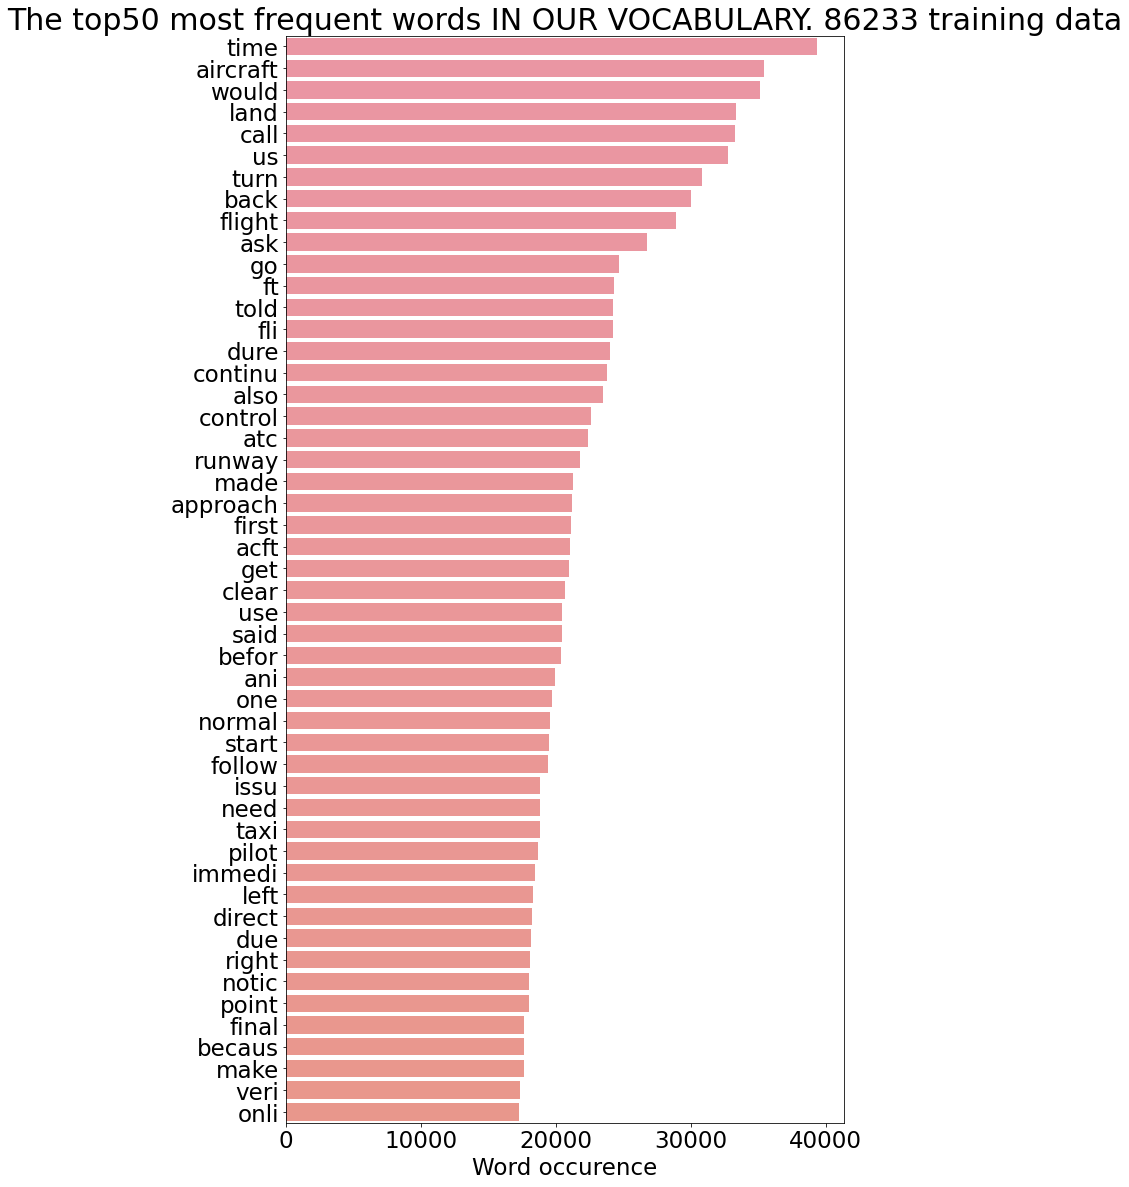

In [ ]:
fig = plt.figure(figsize = (10,20)) 
sns.barplot(data = wcnts_train, y = wcnts_train.index, x = 'occurence')
# Plot the x most frequent occurences
topX = 50
plt.ylim(topX - 0.5)
plt.xlabel('Word occurence')
plt.title(f"The top{topX} most frequent words IN OUR VOCABULARY. {X_train.shape[0]} training data");

In [ ]:
def sort_dict(my_dict):
  """
  Return sorted dictionnary
  """
  sorted_dict = {k: v for k, v in sorted(my_dict.items(), reverse = False, key = lambda item: item[1])}
  # A custom key function in form of a lambda function is supplied to customize the sort order:
  # item[1] means we sort by the value of the my_dict.items()
  # item[0] means we sort by the key   of the my_dict.items()

  return sorted_dict

In [ ]:
# Return alphabetically-sorted tokens. 
# Each token has is code-number (it’s not its frequency)
sort_dict(vectorizer.vocabulary_)
# for just the vocabulary without the position of the word in the sparse matrix, use ‘get_feature_names_out()’

{'000': 0,
 '10': 1,
 '100': 2,
 '1000': 3,
 '10000': 4,
 '11': 5,
 '12': 6,
 '120': 7,
 '13': 8,
 '14': 9,
 '15': 10,
 '150': 11,
 '1500': 12,
 '16': 13,
 '17': 14,
 '18': 15,
 '180': 16,
 '19': 17,
 '20': 18,
 '200': 19,
 '2000': 20,
 '22': 21,
 '24': 22,
 '25': 23,
 '250': 24,
 '27': 25,
 '270': 26,
 '28': 27,
 '30': 28,
 '300': 29,
 '3000': 30,
 '35': 31,
 '360': 32,
 '40': 33,
 '400': 34,
 '4000': 35,
 '45': 36,
 '50': 37,
 '500': 38,
 '5000': 39,
 '60': 40,
 '600': 41,
 '6000': 42,
 '700': 43,
 '7000': 44,
 '80': 45,
 '800': 46,
 '90': 47,
 'abil': 48,
 'abl': 49,
 'abnorm': 50,
 'abort': 51,
 'abov': 52,
 'acar': 53,
 'acceler': 54,
 'accept': 55,
 'access': 56,
 'accid': 57,
 'accomplish': 58,
 'accord': 59,
 'accur': 60,
 'acft': 61,
 'acknowledg': 62,
 'acn': 63,
 'acr': 64,
 'across': 65,
 'act': 66,
 'action': 67,
 'activ': 68,
 'actual': 69,
 'ad': 70,
 'add': 71,
 'addit': 72,
 'address': 73,
 'adequ': 74,
 'adjust': 75,
 'advanc': 76,
 'advis': 77,
 'advisori': 78,
 'aff

In [ ]:
# you can also transform the vocab dictionnary into a list, to be able to slice it
list(sort_dict(vectorizer.vocabulary_))[-1200:-1100]

['4000',
 '45',
 '50',
 '500',
 '5000',
 '60',
 '600',
 '6000',
 '700',
 '7000',
 '80',
 '800',
 '90',
 'abil',
 'abl',
 'abnorm',
 'abort',
 'abov',
 'acar',
 'acceler',
 'accept',
 'access',
 'accid',
 'accomplish',
 'accord',
 'accur',
 'acft',
 'acknowledg',
 'acn',
 'acr',
 'across',
 'act',
 'action',
 'activ',
 'actual',
 'ad',
 'add',
 'addit',
 'address',
 'adequ',
 'adjust',
 'advanc',
 'advis',
 'advisori',
 'affect',
 'aft',
 'agent',
 'agl',
 'agre',
 'ahead',
 'air',
 'airborn',
 'aircraft',
 'airlin',
 'airplan',
 'airport',
 'airspac',
 'airspd',
 'airspe',
 'alert',
 'allow',
 'almost',
 'along',
 'alreadi',
 'also',
 'alt',
 'altern',
 'although',
 'altimet',
 'altitud',
 'alway',
 'amend',
 'amount',
 'angl',
 'ani',
 'announc',
 'annunci',
 'anoth',
 'answer',
 'anti',
 'anticip',
 'anyon',
 'anyth',
 'apch',
 'apolog',
 'appar',
 'appear',
 'appli',
 'applic',
 'approach',
 'appropri',
 'approv',
 'approx',
 'approxim',
 'apu',
 'area',
 'arm',
 'around',
 'arpt',


**There are still 100's of 'zzzz', 'xwwx' etc. words/codes to deal with**

Some of them might be airport names? 
--> use Reg'Ex to substitute them with `<airport>` ?

**There are also hundreds of numbers. You can see this if you sort the vocabulary in reverse order (set 'reverse = False' in the function above).** 

In [ ]:
len(vectorizer.vocabulary_)
# With no stemming, no stop-word filtering: ~70.000 
# With tokenization, stop-word filtering, but no stemming : 60.000+
# With tokenization, stop-word filtering, stemming : 54.000+
# With tokenization, stop-word filtering, stemming, CountVectorizer(min_df=3)  :  21700
# With tokenization, stop-word filtering, stemming, CountVectorizer(min_df=4)  :  18600
# With tokenization, stop-word filtering, stemming, CountVectorizer(min_df=10) :  11800
# With tokenization, stop-word filtering, stemming, CountVectorizer(min_df=20) :   8500
# With tokenization, stop-word filtering, stemming, CountVectorizer(min_df=40) :   6300
# With tokenization, stop-word filtering, stemming, CountVectorizer(min_df=80) :   4700
# With tokenization, stop-word filtering, stemming, CountVectorizer(min_df=160) :  3500
# With tokenization, stop-word filtering, stemming, CountVectorizer(min_df=320) :  2600
# With tokenization, stop-word filtering, stemming, CountVectorizer(min_df=700) :  1700
# With tokenization, stop-word filtering, stemming, CountVectorizer(min_df=1200) : 1200
# With tokenization, stop-word filtering, stemming, CountVectorizer(min_df=5, max_df=160) : 13100
# With tokenization, stop-word filtering, stemming, CountVectorizer(max_df=200) : 51000
# With tokenization, stop-word filtering, stemming, CountVectorizer(max_df=100) : 50000
# With tokenization, stop-word filtering, stemming, CountVectorizer(max_df=50) :  48700
# With tokenization, stop-word filtering, stemming, CountVectorizer(max_df=25) :  46800
# With tokenization, stop-word filtering, stemming, CountVectorizer(max_df=12) :  44000
# With tokenization, stop-word filtering, stemming, CountVectorizer(max_df=6) :   40300
# With tokenization, stop-word filtering, stemming, CountVectorizer(max_df=3) :   35800

1235

### Plot vocab length vs. Vectorizer parameters

Here we automate the procedure that we did above in a manual fashion that led to the numbers shown in the comments above, e.g. 
'# With tokenization, stop-word filtering, stemming, CountVectorizer(min_df=3)  :  21700'

In [ ]:
# Define a parameter range for 'min_df'
param_range_min_df = []
val = 3
for i in range(10):
  
  param_range_min_df.append(val)
  val = val * 2

param_range_min_df

[3, 6, 12, 24, 48, 96, 192, 384, 768, 1536]

In [ ]:
# Manually add some specific values of interest
param_range_min_df = [3, 6, 12, 24, 48, 96, 192, 384, 768, 1200, 1536]

In [ ]:
# Define parameter range for max_df
param_range_max_df = param_range_min_df

In [ ]:
# TAKES ~3min. TO EXECUTE
# Calculate the vocabulary length for each parameter value
# of 'min_df'
vocab_len_min_df = []
for i in range(len(param_range_min_df)):

  # Instantiate the CountVectorizer
  vectorizer = CountVectorizer(min_df=param_range_min_df[i]) 
  
  # Fit to the train data
  vectorizer.fit(X_train)
  
  # Exctract the vocabulary length
  vocab_len_min_df.append(len(vectorizer.get_feature_names_out()))

print('vocab_len for min_df values:', vocab_len_min_df)

###########################
# Do the same for 'max_df'
###########################
vocab_len_max_df = []
for i in range(len(param_range_max_df)):

  # Instantiate the CountVectorizer
  vectorizer = CountVectorizer(max_df=param_range_max_df[i]) 
  
  # Fit to the train data
  vectorizer.fit(X_train)
  
  # Exctract the vocabulary length
  vocab_len_max_df.append(len(vectorizer.get_feature_names_out()))

print('vocab_len for max_df values:', vocab_len_max_df)

vocab_len for min_df values: [21728, 15183, 10882, 7875, 5835, 4369, 3256, 2333, 1615, 1235, 1064]
vocab_len for max_df values: [35771, 40302, 43932, 46660, 48624, 50060, 51163, 52082, 52795, 53175, 53346]


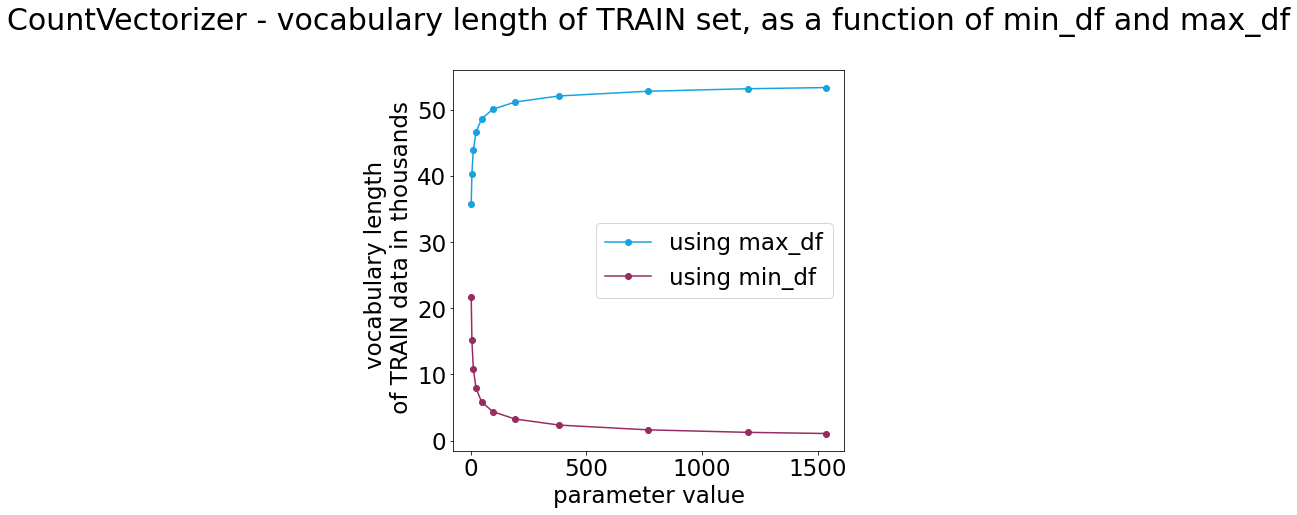

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.title('CountVectorizer - vocabulary length of TRAIN set, as a function of min_df and max_df\n')
plt.xlabel('parameter value')
plt.ylabel('vocabulary length \n of TRAIN data in thousands')

# Data to plot
x1 = param_range_min_df
y1 = np.divide(vocab_len_min_df, 1000)
x2 = param_range_max_df
y2 = np.divide(vocab_len_max_df, 1000)

plt.plot(x2, y2, '-o', c = '#16a3e0', label = 'using max_df')
plt.plot(x1, y1, '-o', c = '#962c61', label = 'using min_df')

#plt.yticks(np.arange(min(y1), max(y2)+1, 50))
plt.legend();


### Observations

**On the one hand...**
* There are approx. 40300 words that appear in less than 6 narratives! This means that we have a lot of very 'special/unique' words.
Some examples: 
  * surprising words, e.g. 'tetanus', 'tetrahedron’, 'teadrop’, 'syrup’, 'sycamor' (a wood species), 'swimmer’, ’swine’, 'sudoku'

  * words/codes, some with atypical letter repetition: 'zinta', 'w041’, ’zz0’, 'zztop’, 'zzzsecond’, ‘zzzzzzzz’, 'xxxxxxxxxxx', yxyx', 'yy3', 'yahoo’, 'xz47z'
Numbers assciated with 'zzz', such as 'zz0' may denote e.g. an anonymized aircraft in contrast to another anonymized aircraft 'zz1' in the same narrative.

  * 100s of tokens are numbers or contain numbers (a quantitative value 'polutes' the quantitative values):


```
Examples + our interpretation, when applicable:

'00237redeye'
'0061'
'10gust19' wind speed and gust speed
'01014g22kt' wind direction: 10deg., speed: 10kts, gusts = 22kt (?)
'06062816000’
'075ft' altitude = 7500 ft.
'10400ft' altitude
'07left' runway orientation?
'0900' time?
'10am' time
'1000lbs' weight
'100hp' horsepower
'100knot' aircraft speed
'1013hpa' sea-level pressure indication in hPa
'1032mb' sea-level pressure indication in mbar
'101r' runway indication
'030r' runway indication
'07left' runway indication 
'10deg' angle indication
'10mile' distance
```
There must also be numbers related to airctaft model types...




**On the other hand...**
* There are approx. 3500 words that appear in more than 160 narratives.
* There are approx. 1200 words that appear in more than 1200 narratives. We focus on this case:

The 20 most frequent among them are: 
```
WORD          OCCURENCE
time          39369
aircraft      35388
would         35117
land          33379
call          33291
us            32732
turn          30804
back          30041
flight        28930
ask           26756
go            24680
ft            24344
told          24248
fli           24204
dure          24031
continu       23789
also          23504
control       22617
atc           22405
runway        21776 
```

  We see that the occurences e.g. of 'aircraft/ can reach up to approx. 40000 narratives, i.e. 50% of the approx. 86200 Narratives that are currently in our train set! In fact, there are 26000 more occurences of 'aircraft' in the form of 'ACFT' (see Helene's analysis)!

  * Looking at the **alphabetical sorting** of this vocabulary, we observe:
    * the presence of mostly meaningfull words, such as the ones listed above. We find extremely few 'strange' tokens such as 'zzz'
  
    * only 48 tokens that begin with a number, all of them probably being numbers:

```
Tokens starting with a number. The number after the ':' is the position in the sparse matrix.
 '000': 0
 '10': 1,
 '100': 2,
 '1000': 3,
 '10000': 4,
 '11': 5,
 '12': 6,
 '120': 7,
 '13': 8,
 '14': 9,
 '15': 10,
 '150': 11,
 '1500': 12,
 '16': 13,
 '17': 14,
 '18': 15,
 '180': 16,
 '19': 17,
 '20': 18,
 '200': 19,
 '2000': 20,
 '22': 21,
 '24': 22,
 '25': 23,
 '250': 24,
 '27': 25,
 '270': 26,
 '28': 27,
 '30': 28,
 '300': 29,
 '3000': 30,
 '35': 31,
 '360': 32,
 '40': 33,
 '400': 34,
 '4000': 35,
 '45': 36,
 '50': 37,
 '500': 38,
 '5000': 39,
 '60': 40,
 '600': 41,
 '6000': 42,
 '700': 43,
 '7000': 44,
 '80': 45,
 '800': 46,
 '90': 47}
```

Given my knowledge of aviation, I think most of them are either:

* altitude indications. 
  * Rather in the format '30000 FT' than the format 'FL300', which also means 30,000 ft. The latter type of format is found in the 'max_df=6' vocabulary. 
  * /!\ the number '000' may originate from altitude indications like '10;000 FT' (there are 16000 occurences of this format in all narratives (Helene's analysis)), where the ';' was used as a delimiter by the tokenizer.

* headings (between 000 and 360 degrees), most of them being headings or runway orientations. However the runway format of e.g. 35L (applies to airport with more than 1 runway, i.e. large airports and means the left of the two parallel runways that are oriented at 350 degrees, i.e. north) is found in the 'max_df=6' vocabulary.


# Models

Train various models.

### GradientBoostClassifier

In [ ]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)

KeyboardInterrupt: ignored

In [ ]:
def plot_conf_mat_heatmap(clf):
  """
  Plot a confusion matrix as a colored table for a given classifier 'clf'.
  """
  #classes = range(0,len(target.unique()))
  classes = clf.classes_ # The true order of the labels used by the classifier. 

  cnf_matrix = confusion_matrix(y_test, y_pred)

  plt.figure(figsize = (10,10))

  plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 90)
  plt.yticks(tick_marks, classes)

  for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
      plt.text(j, i, cnf_matrix[i, j],
              horizontalalignment = "center",
              color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

  plt.ylabel('True labels')
  plt.xlabel('Predicted labels')
  plt.show()

In [ ]:
plot_conf_mat_heatmap(gradient_boosting)

In [ ]:
print(classification_report(y_test, y_pred))

### DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [ ]:
plot_conf_mat_heatmap(decision_tree)

In [ ]:
print(classification_report(y_test, y_pred))


### XGBoost

### Compare the performance

# Ideas for next steps

* perform lemmatization instead / in addition to stemming <-- this will not solve the xuyx, zzz, zzzzz issues...
* classify wrt different label, e.g. 
  * 'Anomaly'
  * Human Factor subcategories, 
  * ...  
* test other models: XGBoost, NN, RF ...
* text processing using RegEx to reduce the dimension of the feature vectors



**After discussion with Alban 13.06.2022**

Continue with the CountVectorizer for now...

Countplot the vocabulary to understand the origin and context of the words
* Delete or substitute the strange words
* Delete the words that appear less than 10x

**How to evaluate the performance of our model?**

Imbalanced distribution among classes
* accuracy is a bad metric --> f1 score instead
* eventually undersampling (but not oversampling)
* eventually dimension reduction using PCA or LDA to select the most relevant featuers or change their representation. Anyways, will be irrelevant when using BERT.

Some classese are too closely related 
* merge classes together?
* choose a different label?


In [ ]:
cv = CountVectorizer(ngram_range=(2, 2)).fit_transform(['The air is hot, I reported it to the Air control.'])
#cv.vocabulary_

len(cv.get_feature_names_out())

AttributeError: ignored